# "Classical" Segmentation method and Delaunay triangulation

This scipt containes the extraction of center nuclei coordinates with "classical" segmentation method. Then we applied Delaunay triangulation and Voronoï diagram on the data.

In order to run the script, choose an instance with large RAM.

# 0. Import packages

pip install opencv-python

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for Delaunay triangulation
from scipy.spatial import Delaunay

# for voronoi diagram
from scipy.spatial import Voronoi, voronoi_plot_2d

# for saving output list
import json

In [35]:
input_images = "./output_images"
output_coords_workspace = "./output_coords"
os.makedirs(output_coords_workspace, exist_ok=True)
output_coords_sb =  "/sbgenomics/output-files/data/nuclei_coords"
os.makedirs(output_coords_sb, exist_ok=True)

# 1. Fonction definition

In [46]:
def get_nuclei_coordinates(img):
    """ Get nuclei coordinates
    Perform "classical" segmentation method to extract center nuclei coordinates
    And save it in json format.
    
    Parameters
    ----------
    img : array of image
        Image to analyze    
    """
    # Appliquer un filtre de seuillage pour segmenter les noyaux
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Appliquer un filtre morphologique pour améliorer la segmentation
    kernel = np.ones((5,5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    nucleus_coords = []
    for cnt in contours:
        (x,y,w,h) = cv2.boundingRect(cnt)
        nucleus_coords.append((x,y))
    fig = plt.figure()
    # Ajoutez l'image à la figure
    plt.imshow(img)
    # Ajoutez les points à la figure
    x, y = zip(*nucleus_coords)
    plt.plot(x, y, 'r+', markersize = 0.07)
    # Affichez la figure
    plt.show()
    with open(f"{output_coords_workspace}/nucleus_coords_{image_name}.json", 'w') as f:
        # indent=2 is not needed but makes the file human-readable 
        # if the data is nested
        json.dump(nucleus_coords, f, indent=2) 
    with open(f"{output_coords_sb}/nucleus_coords_{image_name}.json", 'w') as f:
        # indent=2 is not needed but makes the file human-readable 
        # if the data is nested
        json.dump(nucleus_coords, f, indent=2) 

# 2. Extract nuclei coordinates

## 2.1. A1 without background (V2) 

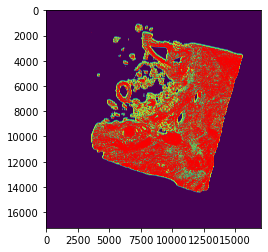

In [37]:
image_name = "A1_wo_background"
img_A1 = cv2.imread(f'{input_images}/A1_without_background.jpg', cv2.IMREAD_GRAYSCALE)
get_nuclei_coordinates(img_A1)

## 2.2. B2 without background (V2) 

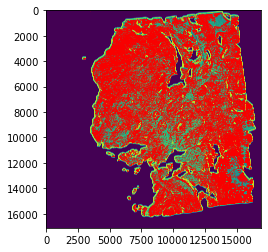

In [45]:
image_name = "B2_wo_background"
img_B2 = cv2.imread(f'{input_images}/B2_without_background.jpg', cv2.IMREAD_GRAYSCALE)
get_nuclei_coordinates(img_B2)

## 2.3. C3 without background (V2) 

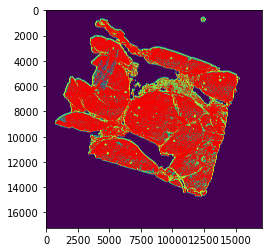

In [47]:
image_name = "C3_wo_background"
img_C3 = cv2.imread(f'{input_images}/C3_without_background.jpg', cv2.IMREAD_GRAYSCALE)
get_nuclei_coordinates(img_C3)

## 2.4. D4 without background (V2) 

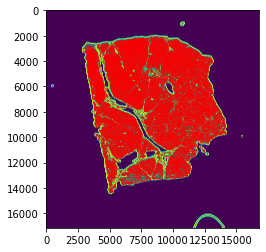

In [48]:
image_name = "D4_wo_background"
img_D4 = cv2.imread(f'{input_images}/D4_without_background.jpg', cv2.IMREAD_GRAYSCALE)
get_nuclei_coordinates(img_D4)

# 3. Delaunay triangulation and Vronoï diagram

## 3.1.  A1 without background (V2) 

### 3.1.1. Delaunay triangulation

In [67]:
with open("output_coords/nucleus_coords_A1_wo_background.json", 'r') as file:
    nucleus_coords_A1 = json.load(file)

In [68]:
tri = Delaunay(nucleus_coords_A1)

In [69]:
np_nucleus_coords = np.array(nucleus_coords_A1)

In [70]:
np_nucleus_coords

array([[6932, 8596],
       [5951, 8150],
       [6135, 8285],
       ...,
       [7204, 1147],
       [7225, 1129],
       [7204, 1128]])

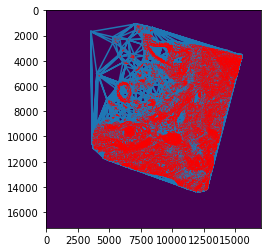

In [71]:
plt.imshow(image)
plt.triplot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], tri.simplices)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.show()

### 3.1.2. Voronoi diagram

In [72]:
vor = Voronoi(nucleus_coords)

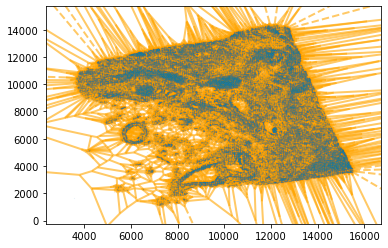

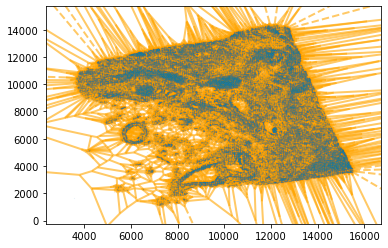

In [73]:
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=0.07)

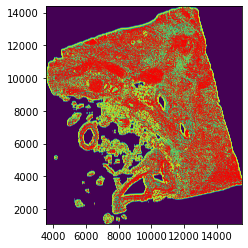

In [74]:
plt.imshow(img_A1)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

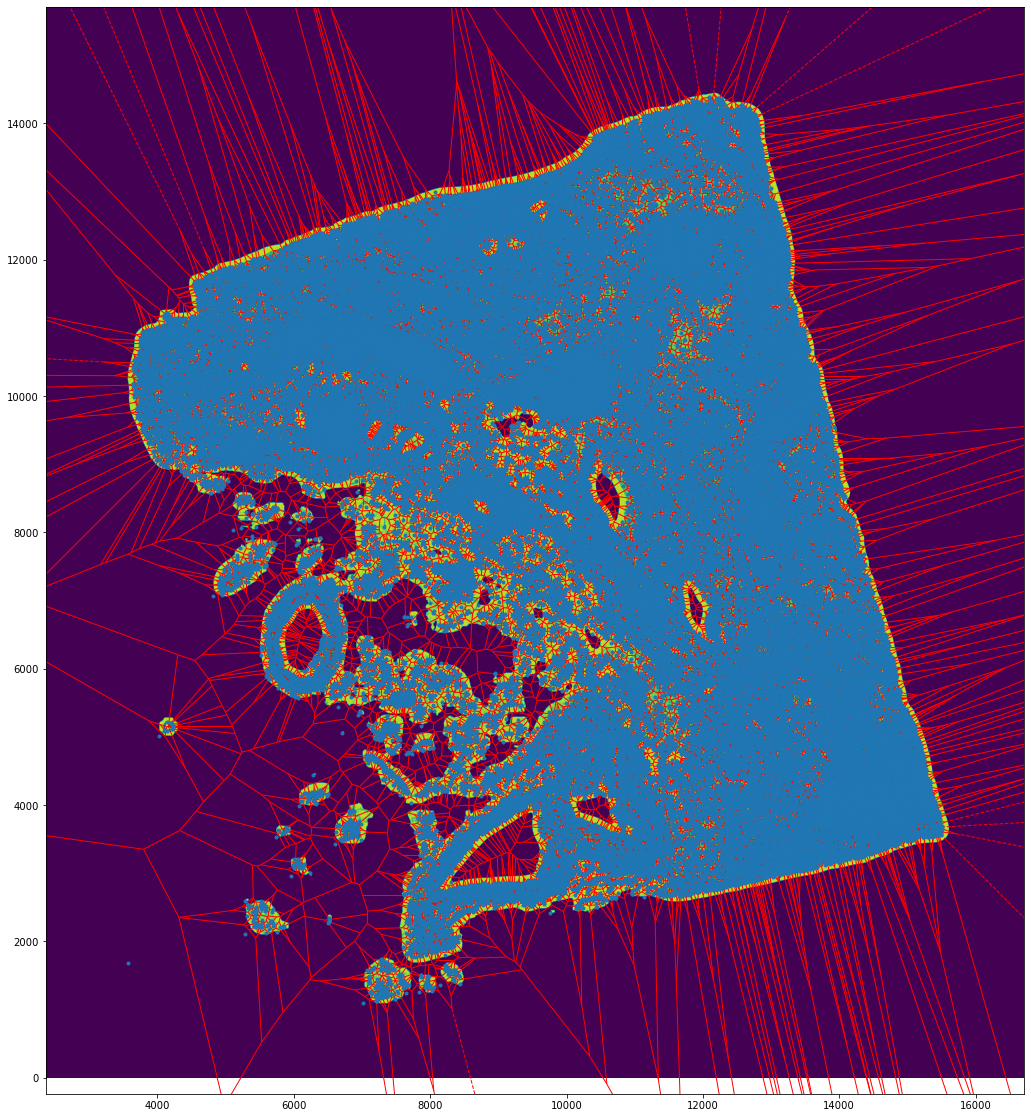

In [75]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.imshow(ndimage.rotate(img, 90))
ax.imshow(image)
voronoi_plot_2d(vor, show_vertices=False, line_colors='red', ax=ax, markerpoints = 0.07)
plt.show()

## 3.2. B2 without background (V2)

### 3.2.1. Delaunay triangulation

In [76]:
with open("output_coords/nucleus_coords_B2_wo_background.json", 'r') as file:
    nucleus_coords_B2 = json.load(file)

In [77]:
tri = Delaunay(nucleus_coords_B2)

In [78]:
np_nucleus_coords = np.array(nucleus_coords_B2)

In [79]:
np_nucleus_coords

array([[ 6395, 14596],
       [ 6511, 14837],
       [ 6525, 14822],
       ...,
       [13775,   158],
       [13615,   158],
       [13710,   156]])

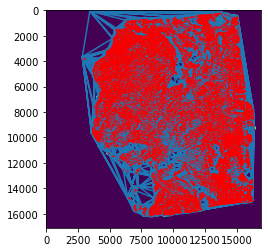

In [81]:
plt.imshow(img_B2)
plt.triplot(nucleus_coords_B2[:,0], np_nucleus_coords[:,1], tri.simplices)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.show()

### 3.2.2. Voronoï diagram

In [86]:
vor = Voronoi(nucleus_coords_B2)

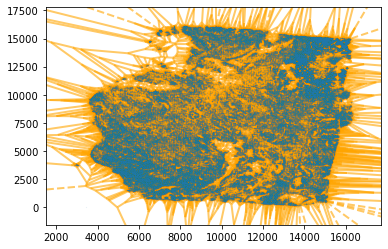

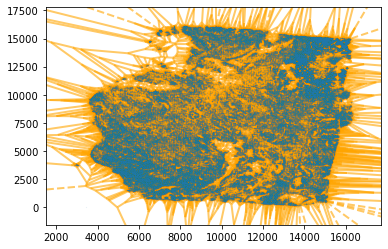

In [87]:
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=0.07)

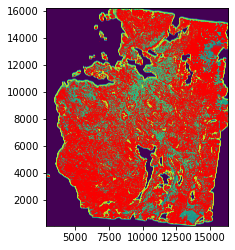

In [92]:
plt.imshow(img_B2)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

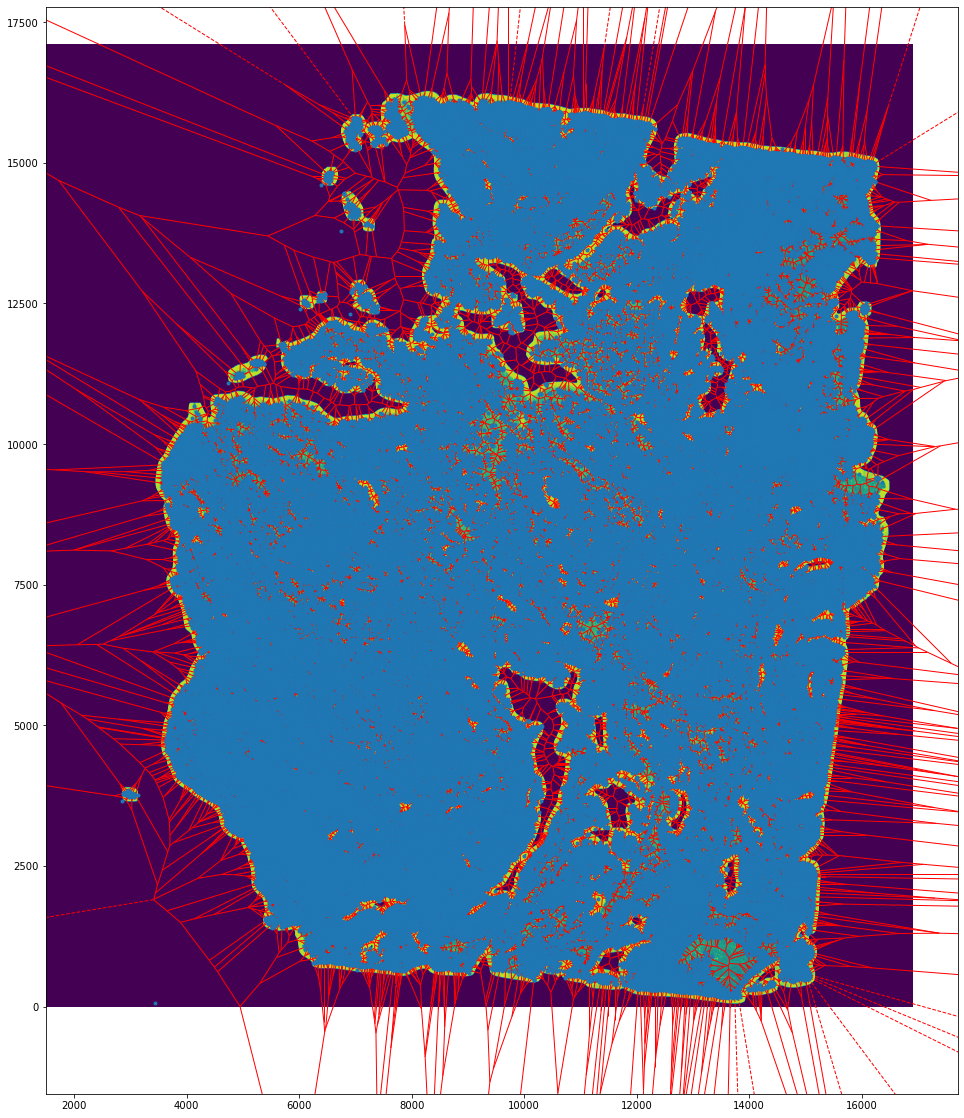

In [91]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.imshow(ndimage.rotate(img, 90))
ax.imshow(img_B2)
voronoi_plot_2d(vor, show_vertices=False, line_colors='red', ax=ax, markerpoints = 0.07)
plt.show()

## 3.3. C3 without background (V2)

### 3.3.1. Delaunay triangulation

In [93]:
with open("output_coords/nucleus_coords_C3_wo_background.json", 'r') as file:
    nucleus_coords_C3 = json.load(file)

In [94]:
tri = Delaunay(nucleus_coords_C3)

In [95]:
np_nucleus_coords = np.array(nucleus_coords_C3)

In [96]:
np_nucleus_coords

array([[ 5773, 12236],
       [13749,  4688],
       [  682,   672],
       ...,
       [12444,   656],
       [12440,   654],
       [12343,   649]])

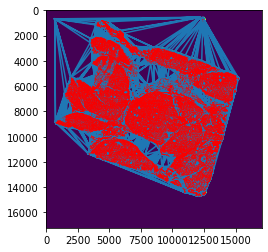

In [97]:
plt.imshow(img_C3)
plt.triplot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], tri.simplices)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.show()

### 3.3.2. Voronoï diagram

In [98]:
vor = Voronoi(nucleus_coords_C3)

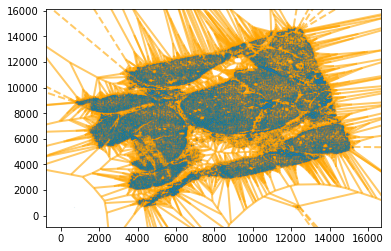

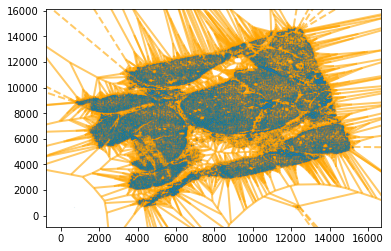

In [99]:
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=0.07)

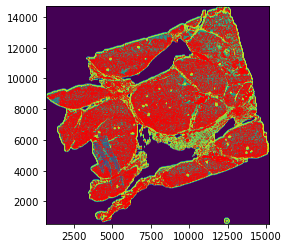

In [102]:
plt.imshow(img_C3)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

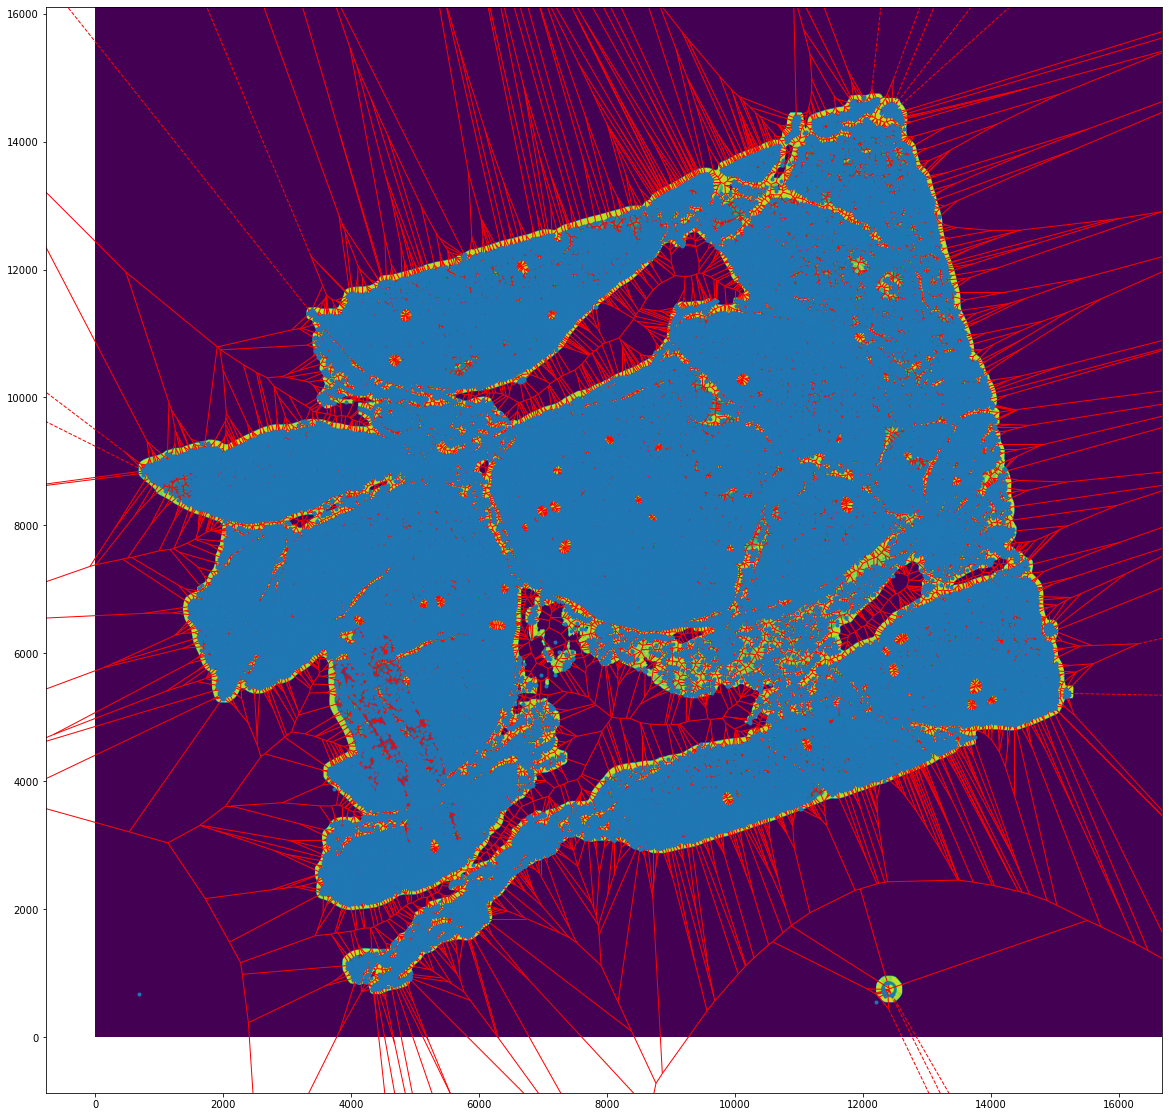

In [101]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.imshow(ndimage.rotate(img, 90))
ax.imshow(img_C3)
voronoi_plot_2d(vor, show_vertices=False, line_colors='red', ax=ax, markerpoints = 0.07)
plt.show()

## 3.4. D4 without background (V2)

### 3.4.1. Delaunay triangulation

In [103]:
with open("output_coords/nucleus_coords_D4_wo_background.json", 'r') as file:
    nucleus_coords_D4 = json.load(file)

In [104]:
tri = Delaunay(nucleus_coords_D4)

In [105]:
np_nucleus_coords = np.array(nucleus_coords_D4)

In [106]:
np_nucleus_coords

array([[11693, 16134],
       [11587, 16009],
       [12047, 10663],
       ...,
       [ 8752,  2047],
       [ 8783,  2040],
       [10570,   892]])

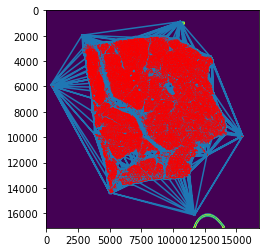

In [107]:
plt.imshow(img_D4)
plt.triplot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], tri.simplices)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.show()

### 3.4.2. Voronoï diagram

In [108]:
vor = Voronoi(nucleus_coords_D4)

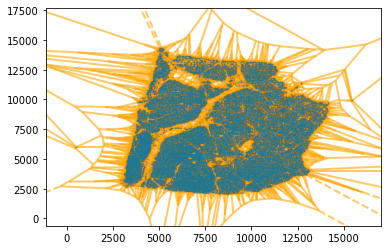

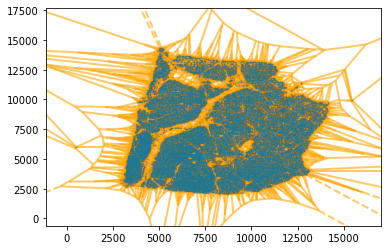

In [109]:
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=0.07)

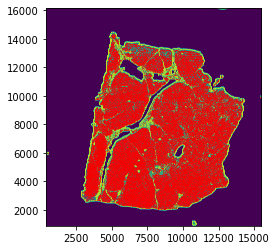

In [110]:
plt.imshow(img_D4)
plt.plot(np_nucleus_coords[:,0], np_nucleus_coords[:,1], 'r+', markersize = 0.07)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.show()

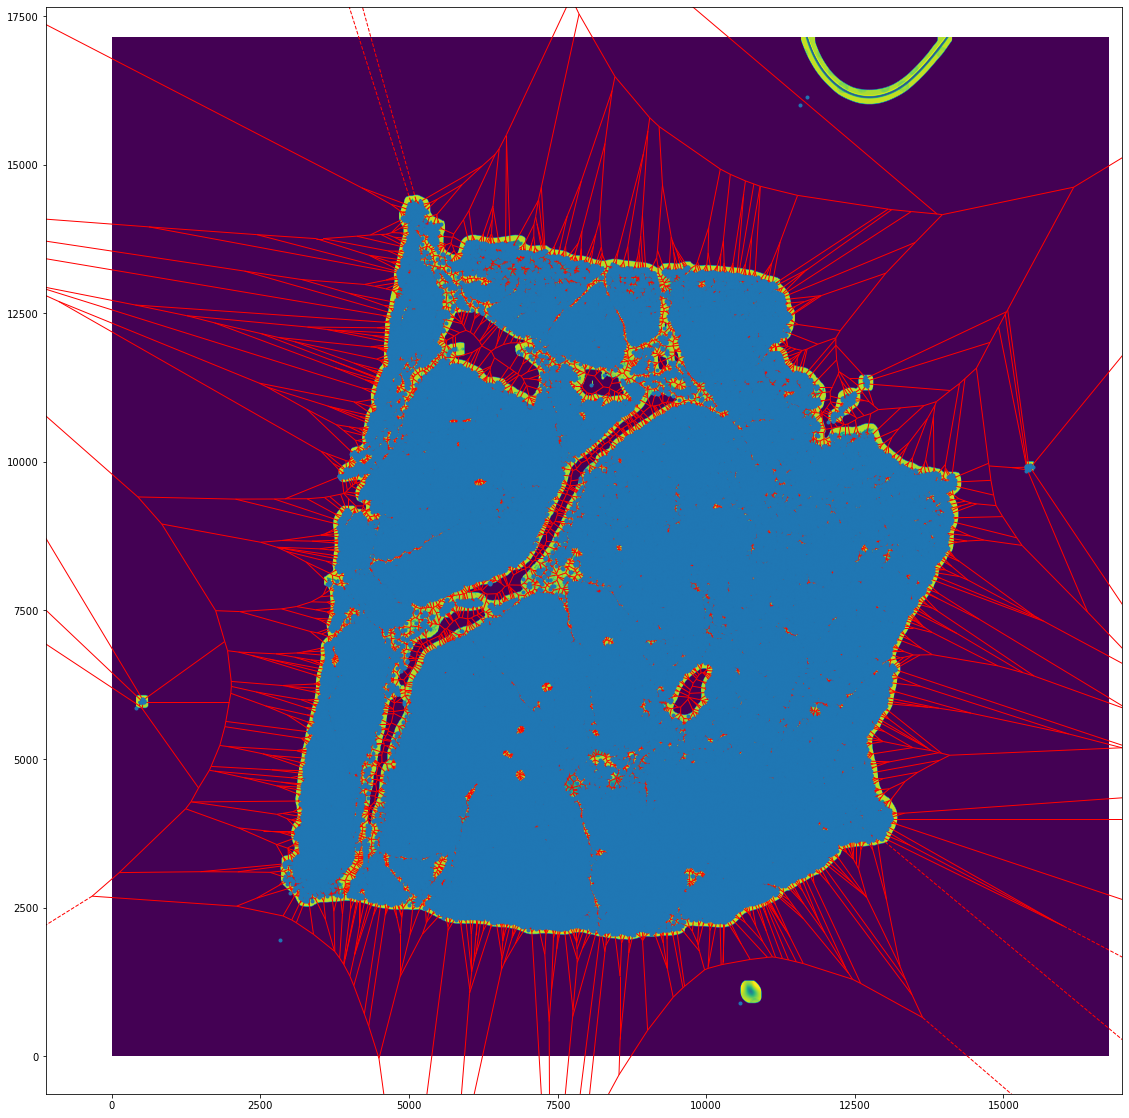

In [111]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.imshow(ndimage.rotate(img, 90))
ax.imshow(img_D4)
voronoi_plot_2d(vor, show_vertices=False, line_colors='red', ax=ax, markerpoints = 0.07)
plt.show()